# NBA Draft Data Analysis

## Introduction

## Asking Questions

#### * Q1: Which college produces the most / best NBA talent?

#### * Q2: Does higher draft position actually correlate to better quality of player?

#### * Q3: Which teams have drafted best between 1989 - 2010?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/pantsu/Downloads/nbaplayersdraft.csv', index_col=0)

df.head()

,year,rank,overall_pick,team,player,college,years_active,games,minutes_played,points,...,3_point_percentage,free_throw_percentage,average_minutes_played,points_per_game,average_total_rebounds,average_assists,win_shares,win_shares_per_48_minutes,box_plus_minus,value_over_replacement
id,,,,,,,,,,,,,,,,,,,,,
1,1989,1,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,4494.0,...,0.050,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4
2,1989,2,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,6439.0,...,0.393,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9
3,1989,3,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,10544.0,...,0.375,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5
4,1989,4,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,18336.0,...,0.400,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9
5,1989,5,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,5680.0,...,0.135,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1922 entries, 1 to 1922
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       1922 non-null   int64  
 1   rank                       1922 non-null   int64  
 2   overall_pick               1922 non-null   int64  
 3   team                       1922 non-null   object 
 4   player                     1922 non-null   object 
 5   college                    1585 non-null   object 
 6   years_active               1669 non-null   float64
 7   games                      1669 non-null   float64
 8   minutes_played             1669 non-null   float64
 9   points                     1669 non-null   float64
 10  total_rebounds             1669 non-null   float64
 11  assists                    1669 non-null   float64
 12  field_goal_percentage      1665 non-null   float64
 13  3_point_percentage         1545 non-null   float64
 1

In [3]:
#Renaming columns
df = df.rename(columns={'overall_pick': 'pick', 'value_over_replacement': 'VORP', 'total_rebounds': 'rebounds', 
                        'points_per_game': 'PPG', 'average_total_rebounds': 'RPG', 'average_assists': 'APG',
                        'win_shares_per_48_minutes': 'WS/48'})

In [5]:
#We are determining quality of player based on multiple factors being 
#years active, VORP, BPM, win shares over 48min and (PPG+APG+RPG)

#Going to utilize dataset from 1989 - 2010 NBA Draft only so that all players in dataset have ability to play at least 10+years
#Also analyze picks 1-54 as picks 55-60 were introduced in later date than 1989

df = df[(df['year'] < 2011) & (df['pick'] < 55)]

In [32]:
#Check for duplicate rows
df.duplicated().sum()

0

In [34]:
#Identify null values
df.isnull().sum()

year                        0
rank                        0
pick                        0
team                        0
player                      0
college                   189
years_active              151
games                     151
minutes_played            151
points                    151
rebounds                  151
assists                   151
field_goal_percentage     153
3_point_percentage        235
free_throw_percentage     171
average_minutes_played    151
PPG                       151
RPG                       151
APG                       151
win_shares                151
WS/48                     152
box_plus_minus            152
VORP                      151
dtype: int64

## Section 1: Which college is the best for NBA talents?

### 1. Which college produces the most amount of NBA prospects?

In [35]:
#Create temporary DF to assess null 'college' values
nocollege = df[df[['college']].isnull().all(1)]

nocollege.head()
#Upon scan of data, these are all players that came straight from HS or overseas, allowing us to exclude these players from analysis

,year,rank,pick,team,player,college,years_active,games,minutes_played,points,...,3_point_percentage,free_throw_percentage,average_minutes_played,PPG,RPG,APG,win_shares,WS/48,box_plus_minus,VORP
id,,,,,,,,,,,,,,,,,,,,,
26,1989,26,26,LAL,Vlade Divac,NaN,16.0,1134.0,33838.0,13398.0,...,0.235,0.692,29.8,11.8,8.2,3.1,96.4,0.137,2.3,36.3
40,1989,40,40,BOS,Dino Radja,NaN,4.0,224.0,7308.0,3733.0,...,0.000,0.735,32.6,16.7,8.4,1.6,14.3,0.094,-0.4,3.0
83,1990,29,29,CHI,Toni Kukoč,NaN,13.0,846.0,22212.0,9810.0,...,0.335,0.729,26.3,11.6,4.2,3.7,59.6,0.129,2.8,27.2
106,1990,52,52,CLE,Stefano Rusconi,NaN,1.0,7.0,30.0,8.0,...,NaN,0.400,4.3,1.1,0.9,0.4,-0.1,-0.104,-11.4,-0.1
159,1991,51,51,HOU,Žan Tabak,NaN,6.0,247.0,3607.0,1233.0,...,0.000,0.525,14.6,5.0,3.6,0.7,2.4,0.032,-4.9,-2.7


In [6]:
#create df of the top 20 colleges based on number of drafted players
player_quantity = df.groupby('college')[['player']].count()
player_quantity = player_quantity.nlargest(20, columns=['player'], keep='first')

player_quantity.head()

,player
college,
Arizona,29
Duke,29
UCLA,27
UNC,27
Kansas,23


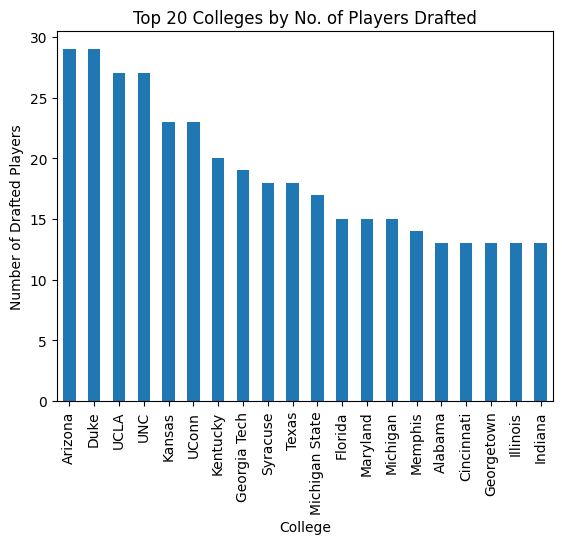

In [7]:
player_quantity.plot.bar(legend=False)

plt.title('Top 20 Colleges by No. of Players Drafted')
plt.xlabel('College')
plt.ylabel('Number of Drafted Players')
plt.show()

In [8]:
#Create subset of colleges that have sent at least 15 drafted prospects
#Calculate the avg draft position of players from each college to assess quality of prospects 
draft_position = df.groupby('college')['pick'].agg(['count', 'mean'])
draft_position = draft_position[draft_position['count'] > 9]
draft_position = draft_position.nsmallest(20, columns = 'mean')

draft_position.head()

,count,mean
college,,
UNC,27,18.407407
Georgia Tech,19,18.947368
Duke,29,19.517241
Louisville,13,19.538462
Michigan,15,19.933333


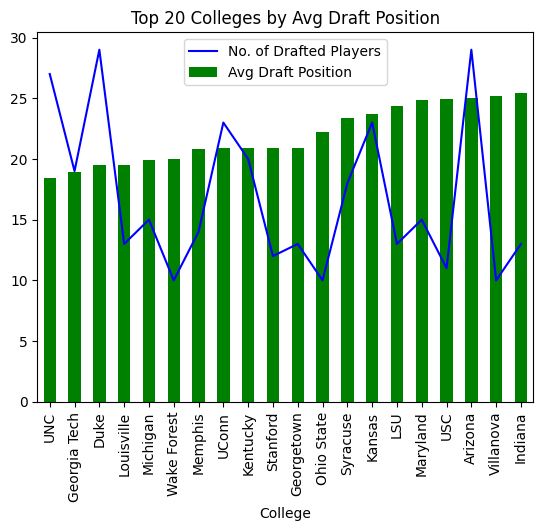

In [9]:
draft_position['count'].plot(kind='line', color='b')
draft_position['mean'].plot(kind='bar', color='g')

plt.title('Top 20 Colleges by Avg Draft Position')
plt.xlabel('College')
plt.legend(['No. of Drafted Players', 'Avg Draft Position'])

plt.show()         

#based on the graph, UNC and Duke are the best NBA talent factories when considering both quality and quantity of prospects

### Section 2: How much does draft position actually matter?

In [40]:
#Notice same amount of null values in many statistical categories (Ex. years_active, games, points, assists, etc)
#Create temporary df to examine values
temp_df = df[df[['years_active']].isnull().all(1)]

temp_df.head()
#Upon examination of data, these are all players that have not had any NBA gametime

,year,rank,pick,team,player,college,years_active,games,minutes_played,points,...,3_point_percentage,free_throw_percentage,average_minutes_played,PPG,RPG,APG,win_shares,WS/48,box_plus_minus,VORP
id,,,,,,,,,,,,,,,,,,,,,
42,1989,42,42,DEN,Michael Cutright,McNeese State University,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,1989,44,44,PHI,Reggie Cross,Hawaii,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,1989,47,47,DEN,Reggie Turner,UAB,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,1989,48,48,UTA,Junie Lewis,University of South Alabama,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,1989,53,53,DAL,Jeff Hodge,University of South Alabama,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#Will replace null values with 0 where appropriate 
#Represents that they did not play and did not contribute to any stats
#These players must be included in the mean 
df['years_active'].fillna(0, inplace=True)
df['games'].fillna(0, inplace=True)
df['minutes_played'].fillna(0, inplace=True)
df['points'].fillna(0, inplace=True)
df['rebounds'].fillna(0, inplace=True)
df['assists'].fillna(0, inplace=True)
df['PPG'].fillna(0, inplace=True)
df['APG'].fillna(0, inplace=True)
df['RPG'].fillna(0, inplace=True)

In [31]:
#Change datatype of columns
df['years_active'] = df['years_active'].astype('int')
df['games'] = df['games'].astype('int')
df['points'] = df['points'].astype('int')
df['assists'] = df['assists'].astype('int')
df['rebounds'] = df['rebounds'].astype('int')

In [32]:
#We will be analyzing players based on 2 measures: stats and VORP
#VORP is a stat created that measures player performance in one stat
#Stats allude to a players' point, assist and rebound total and we will create column to aggregate them into one sum
df['TOT_stats'] = df['points'] + df['assists'] + df['rebounds']

In [33]:
TOT_stats = df.groupby('pick')['TOT_stats']

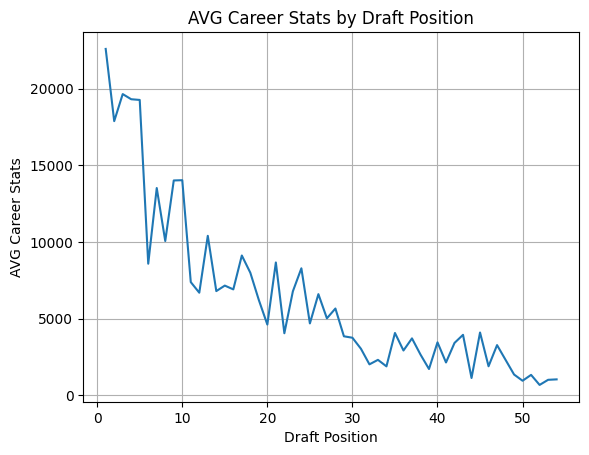

In [34]:
TOT_stats.mean().plot.line(legend=False)

plt.title('AVG Career Stats by Draft Position')
plt.xlabel('Draft Position')
plt.ylabel('AVG Career Stats')
plt.grid()
plt.show()

#Based on graph we see that the #1 pick acculumates the most stats and there is a big dropoff following top 5
#Generally stat acculumation decreases as you go down draft
#Also big dropoff after exiting top 10
#No.6 pick has been outlier in top 10 in this stretch 

In [35]:
#This time looking at an actual measure provided by the NBA to aggregate player performance / quality
#This stat is VORP and it accumulates over time, which should prevent errant outliers
#But based on statistics, it seems there are some outliers especially on the high end
df['VORP'].describe()

count    1035.000000
mean        5.790242
std        13.542340
min        -8.500000
25%        -0.500000
50%         0.000000
75%         6.750000
max       142.600000
Name: VORP, dtype: float64

In [36]:
#We will check the highest values of VORP for potential outliers being result of insufficient data
#But we see here that it is not a case of insufficient data skewing VORP results, so we'll keep this data
df.nlargest(5, columns = 'VORP')

,year,rank,pick,team,player,college,years_active,games,minutes_played,points,...,free_throw_percentage,average_minutes_played,PPG,RPG,APG,win_shares,WS/48,box_plus_minus,VORP,TOT_stats
id,,,,,,,,,,,,,,,,,,,,,
786,2003,1,1,CLE,LeBron James,NaN,19,1366,52139.0,37062,...,0.734,38.2,27.1,7.5,7.4,249.5,0.230,8.9,142.6,57317
329,1995,5,5,MIN,Kevin Garnett,NaN,21,1462,50418.0,26071,...,0.789,34.5,17.8,10.0,3.7,191.4,0.182,5.6,96.9,46178
906,2005,4,4,NOH,Chris Paul,Wake Forest,17,1155,39896.0,20936,...,0.871,34.5,18.1,4.5,9.5,198.9,0.239,7.3,93.7,37119
441,1997,1,1,SAS,Tim Duncan,Wake Forest,19,1392,47368.0,26496,...,0.696,34.0,19.0,10.8,3.0,206.4,0.209,5.6,91.1,45812
506,1998,9,9,MIL,Dirk Nowitzki,NaN,21,1522,51368.0,31560,...,0.879,33.8,20.7,7.5,2.4,206.3,0.193,4.5,84.8,46700


In [37]:
#Consistent pattern here with VORP outliers on lower end also not being result of insufficient data
df.nsmallest(5, columns = 'VORP')

,year,rank,pick,team,player,college,years_active,games,minutes_played,points,...,free_throw_percentage,average_minutes_played,PPG,RPG,APG,win_shares,WS/48,box_plus_minus,VORP,TOT_stats
id,,,,,,,,,,,,,,,,,,,,,
498,1998,1,1,LAC,Michael Olowokandi,University of the Pacific,9,500,13129.0,4135,...,0.597,26.3,8.3,6.8,0.7,2.5,0.009,-4.6,-8.5,7876
97,1990,43,43,SAS,Tony Massenburg,Maryland,13,683,12291.0,4238,...,0.705,18.0,6.2,4.3,0.4,15.6,0.061,-4.5,-7.8,7468
60,1990,6,6,MIN,Felton Spencer,Louisville,12,640,12298.0,3354,...,0.658,19.2,5.2,5.4,0.3,20.9,0.081,-4.3,-7.0,7003
89,1990,35,35,WSB,Greg Foster,Texas-El Paso,13,656,7974.0,2538,...,0.748,12.2,3.9,2.6,0.5,5.6,0.033,-5.5,-7.0,4580
689,2001,18,18,HOU,Jason Collins,Stanford,13,735,14974.0,2621,...,0.647,20.4,3.6,3.7,0.9,20.1,0.064,-3.7,-6.5,5953


In [38]:
VORP = df.groupby('pick')['VORP']

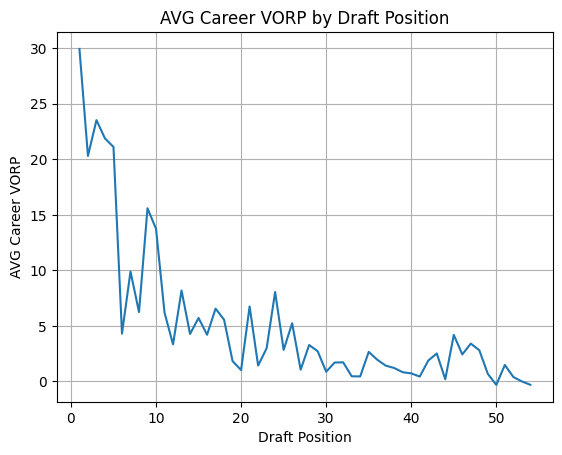

In [39]:
VORP.mean().plot.line(legend=False)

plt.title('AVG Career VORP by Draft Position')
plt.xlabel('Draft Position')
plt.ylabel('AVG Career VORP')
plt.grid()
plt.show()

#Graph shows us similar story to TOT stats with #1 pick being clear best pick and a big dropoff following top 5 and then top 10

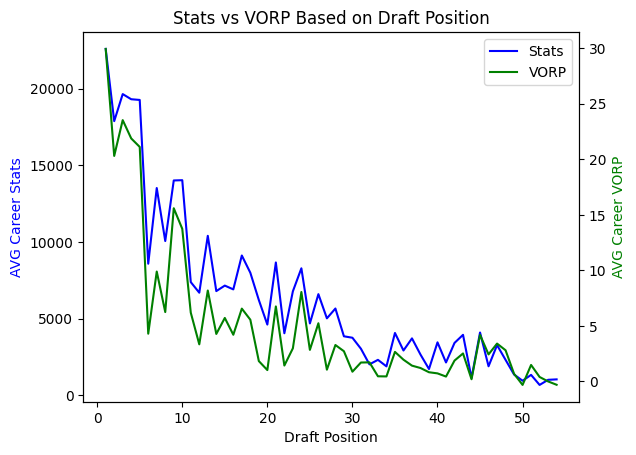

In [68]:
#Displaying AVG career stats and VORP in same graph to display the correlation
picks = [pick for pick, df in TOT_stats]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(picks, TOT_stats.mean(), 'b', label='Stats')
ax2.plot(picks, VORP.mean(), 'g', label='VORP')

ax1.set_xlabel('Draft Position')
ax1.set_ylabel('AVG Career Stats', color='b')
ax2.set_ylabel('AVG Career VORP', color='g')

fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.title('Stats vs VORP Based on Draft Position')
plt.show()
#Graph shows direct correlation between TOT stats and VORP, indicating them as consistent indicators of player quality

In [42]:
#This time want to get averages per season to see if anything changes
df['stats/season'] = df['PPG'] + df['APG'] + df['RPG']
df['VORP/season'] = df['VORP'] / df['years_active']

In [44]:
TOT_averages = df.groupby('pick')['stats/season']
VORP_averages = df.groupby('pick')['VORP/season']

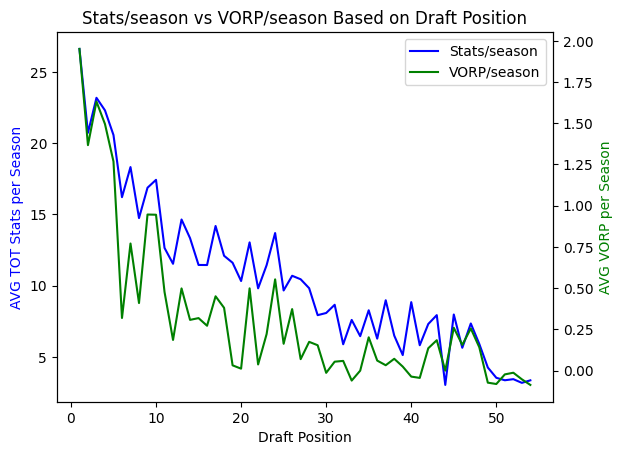

In [70]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(picks, TOT_averages.mean(), 'b', label='Stats/season')
ax2.plot(picks, VORP_averages.mean(), 'g', label='VORP/season')

ax1.set_xlabel('Draft Position')
ax1.set_ylabel('AVG TOT Stats per Season', color='b')
ax2.set_ylabel('AVG VORP per Season', color='g')

fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.title('Stats/season vs VORP/season Based on Draft Position')
plt.show()

#The season averages show a similar story to the career averages 